In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from baselines import ZeroUniformOutputBaseline

from network.training_heloc import train_model

model = train_model(
    layers=[23,64,2],
    num_epochs=10,
    lr = 0.001,
    batch_size=16,
)[0]



/home/leon/programming/XAI-baselines/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


Final metrics: 
Validation-Loss:  0.654
Validation-Accuracy:  66.3%
train-Loss:  0.553
train-Accuracy:  68.6%
# Parameters: 1666
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=23, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=2, bias=True)
  )
)


In [3]:
import torch
print(f"Prediction of zero baseline: {model.predict(torch.zeros(1, 23)).detach().numpy()})")

baseline_generator = ZeroUniformOutputBaseline(model)
zero_uniform_output_baseline = baseline_generator.get_baseline()

/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()


Prediction of zero baseline: [[0.5250058 0.4749942]])


  0%|          | 0/300 [00:00<?, ?it/s]

/home/leon/programming/XAI-baselines/network/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:09<00:00, 33.04it/s]

autobaseline: tensor([ 0.0075,  0.0058,  0.0061,  0.0061,  0.0096,  0.0079,  0.0076,  0.0085,
         0.0089,  0.0079,  0.0051,  0.0073,  0.0067,  0.0089,  0.0078,  0.0061,
        -0.0441,  0.0084,  0.0074,  0.0086,  0.0086,  0.0053,  0.0067],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5006, 0.4994])


  0%|          | 0/1045 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:69: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 1045/1045 [00:02<00:00, 454.19it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


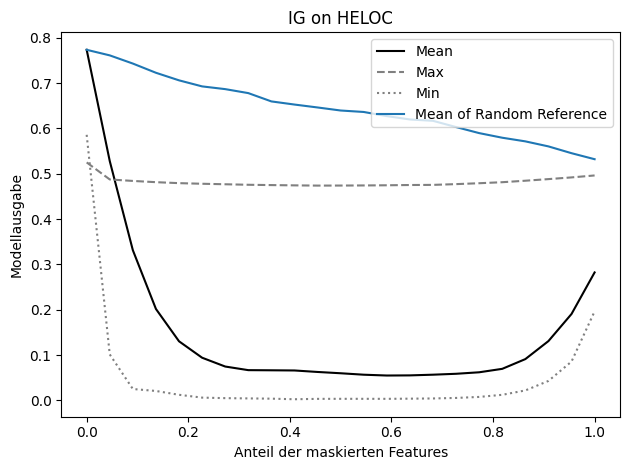

In [6]:
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from data import HELOC

data = HELOC(mode="validation")

ig = IntegratedGradient(model)

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC",
    attribution_baseline=zero_uniform_output_baseline,
    masking_baseline=zero_uniform_output_baseline,
    apply_log=False
)